In [26]:
# import dependencies for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


# Data Cleaning

In [2]:
# Read dataframe
smoke_df = pd.read_csv("Resources/smoke_detection_iot.csv")
smoke_df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [3]:
smoke_df.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [4]:
print(smoke_df["UTC"].value_counts())
print(smoke_df["CNT"].value_counts())
smoke_df.shape

1654784000    1
1654748484    1
1654744390    1
1654746439    1
1655125324    1
             ..
1654772399    1
1654733490    1
1655124659    1
1654745784    1
1654786047    1
Name: UTC, Length: 62630, dtype: int64
0        5
372      5
1139     5
20       5
52       5
        ..
22532    2
24579    2
6311     2
24744    2
10454    2
Name: CNT, Length: 24994, dtype: int64


(62630, 16)

"Fire Alarm" has 2 data, 1 and 0, it is a binary problem. UTC has been assigned unique values, do not appear to be test values, which is not helpful for analysis.

In [5]:
# Check missing values
smoke_df.isnull().count()

Unnamed: 0        62630
UTC               62630
Temperature[C]    62630
Humidity[%]       62630
TVOC[ppb]         62630
eCO2[ppm]         62630
Raw H2            62630
Raw Ethanol       62630
Pressure[hPa]     62630
PM1.0             62630
PM2.5             62630
NC0.5             62630
NC1.0             62630
NC2.5             62630
CNT               62630
Fire Alarm        62630
dtype: int64

No missing values

In [6]:
smoke_df.drop(["Unnamed: 0", "UTC"], axis=1, inplace=True)

# Visualization

<AxesSubplot:>

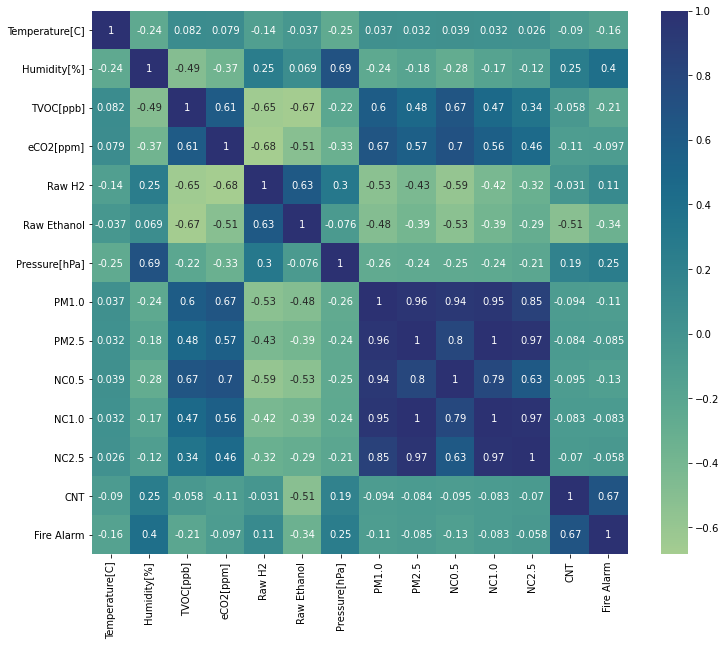

In [7]:
# Explore the parameters correlation
plt.figure(figsize=(12,10))
sns.heatmap(smoke_df.corr(), annot=True, cmap="crest")

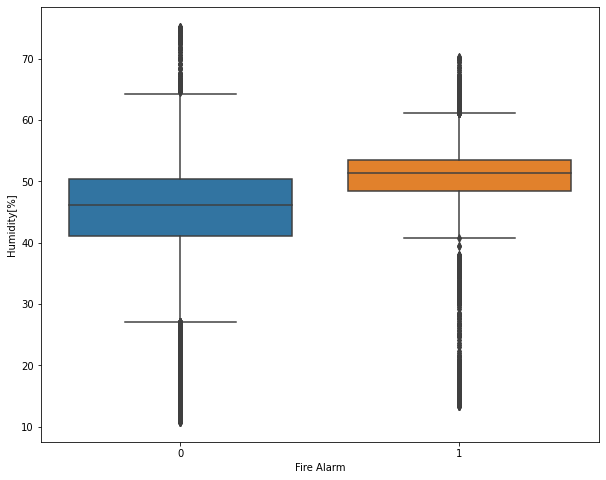

In [8]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Fire Alarm", y="Humidity[%]", data=smoke_df)

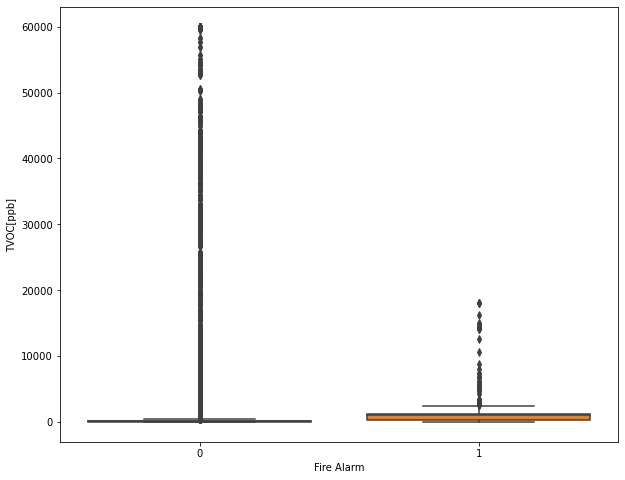

In [9]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Fire Alarm", y="TVOC[ppb]", data=smoke_df)

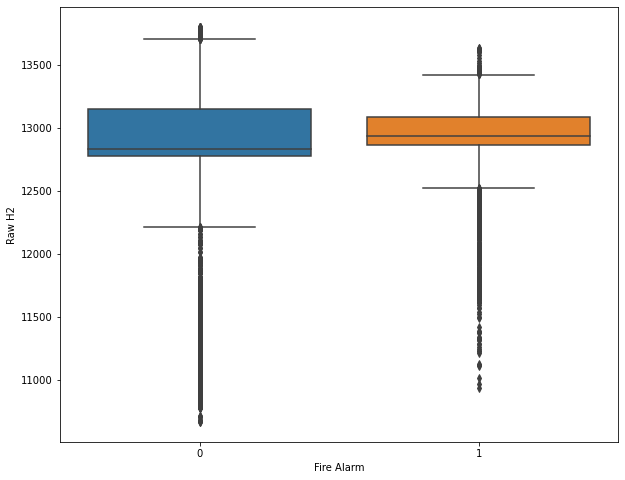

In [10]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Fire Alarm", y="Raw H2", data=smoke_df)

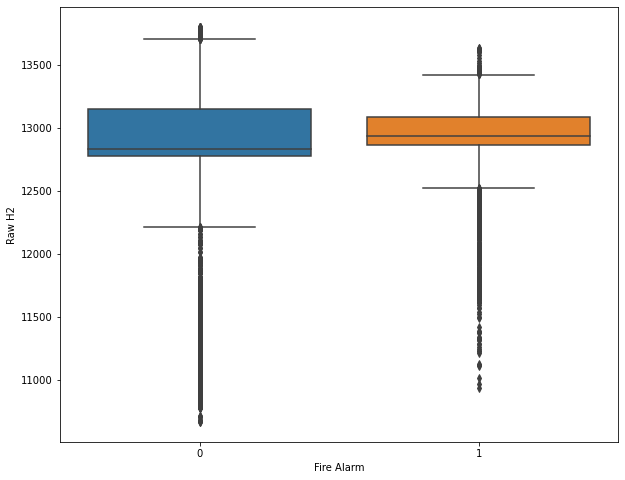

In [11]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Fire Alarm", y="Raw H2", data=smoke_df)

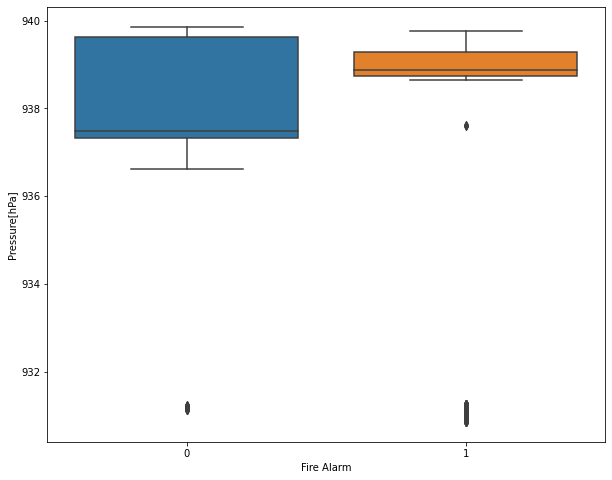

In [12]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Fire Alarm", y="Pressure[hPa]", data=smoke_df)

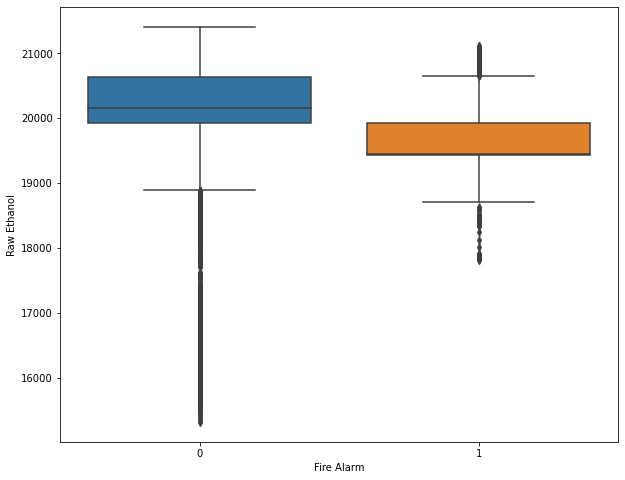

In [13]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Fire Alarm", y="Raw Ethanol", data=smoke_df)

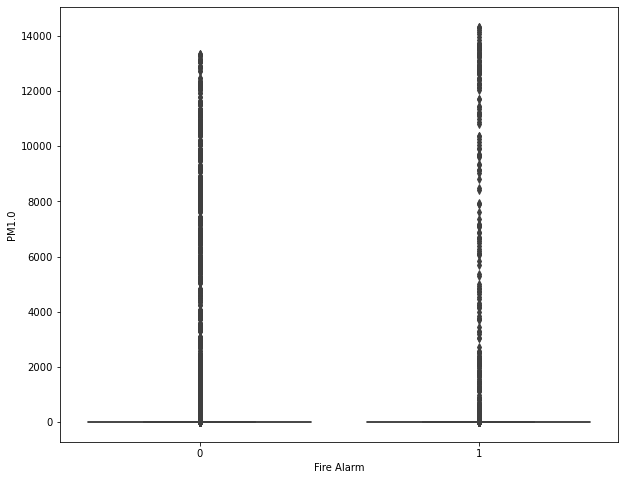

In [14]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Fire Alarm", y="PM1.0", data=smoke_df)

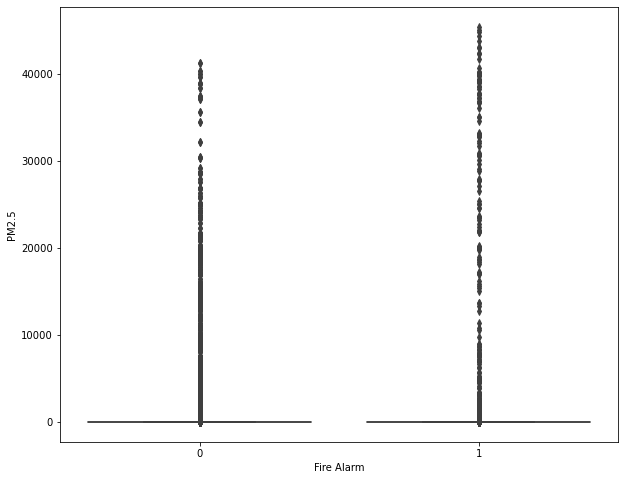

In [15]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Fire Alarm", y="PM2.5", data=smoke_df)

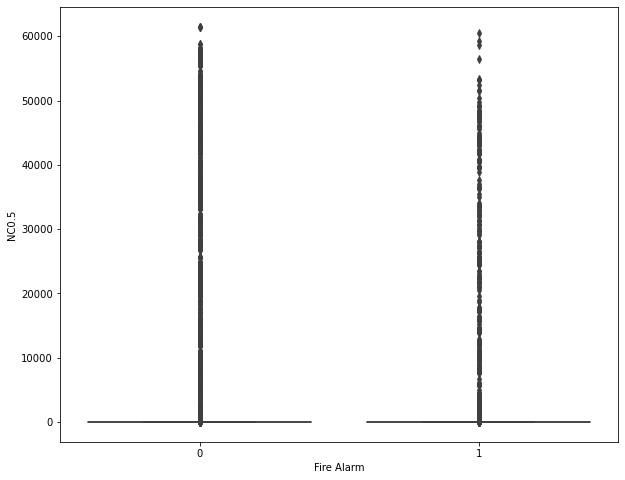

In [16]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Fire Alarm", y="NC0.5", data=smoke_df)

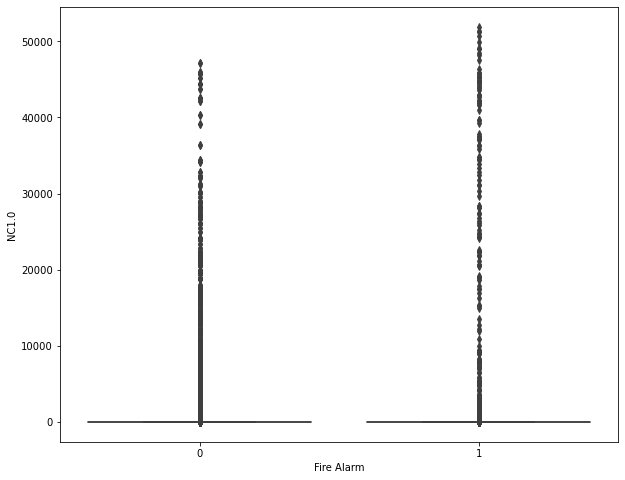

In [17]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Fire Alarm", y="NC1.0", data=smoke_df)

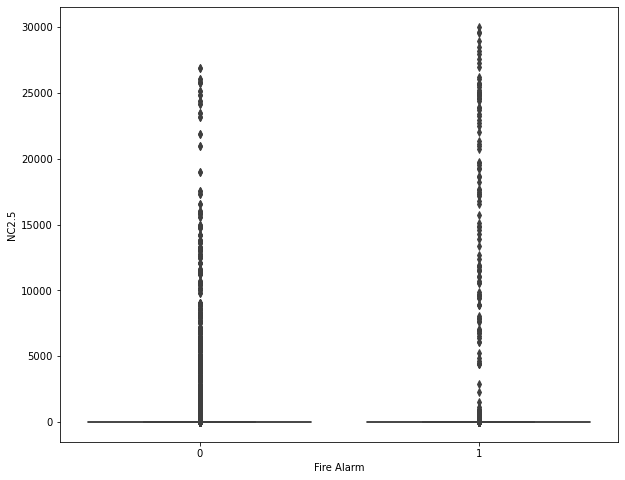

In [18]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Fire Alarm", y="NC2.5", data=smoke_df)

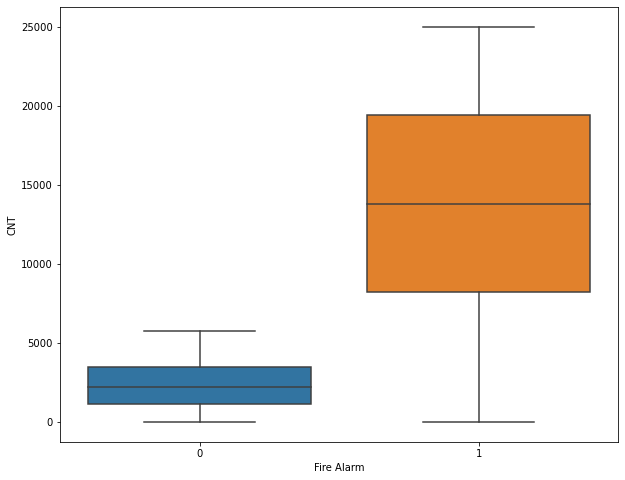

In [19]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x="Fire Alarm", y="CNT", data=smoke_df)

Both boxplot and correlation heatmap showed that ppm, ppb, PM1.0, PM2.5, NC0.5, NC1.0 and NC2.5 has little correlation with the results, will drop for machine learning.

In [20]:
#Decide final dataframe for machine learning
smoke_ml = smoke_df.drop(["TVOC[ppb]", "eCO2[ppm]", "PM1.0", "PM2.5", "NC0.5", "NC1.0", "NC2.5"], axis=1)
smoke_ml.head()

,Temperature[C],Humidity[%],Raw H2,Raw Ethanol,Pressure[hPa],CNT,Fire Alarm
0,20.000,57.36,12306,18520,939.735,0,0
1,20.015,56.67,12345,18651,939.744,1,0
2,20.029,55.96,12374,18764,939.738,2,0
3,20.044,55.28,12390,18849,939.736,3,0
4,20.059,54.69,12403,18921,939.744,4,0


# Machine learning

In [21]:
X = smoke_ml.drop("Fire Alarm", axis=1)
y = smoke_ml["Fire Alarm"]
print(X.shape)
print(y.shape)

(62630, 6)
(62630,)


In [22]:
# Split to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Scale data
X_scalar = StandardScaler().fit(X_train)
X_train_scaled = X_scalar.transform(X_train)
X_test_scaled = X_scalar.transform(X_test)

In [23]:
# SVC
model = SVC(kernel = "sigmoid")
model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67      5333
           1       0.87      0.87      0.87     13456

    accuracy                           0.81     18789
   macro avg       0.77      0.77      0.77     18789
weighted avg       0.81      0.81      0.81     18789



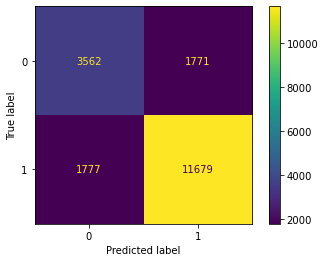

In [28]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
chart = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model.classes_)
chart.plot()

In [31]:
# Random Forest
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

1.0

In [32]:
# Feature importance
print(model.feature_importances_)

[0.02639979 0.13018222 0.04822301 0.09936346 0.22695594 0.46887557]


In [34]:
list(X.columns)

['Temperature[C]',
 'Humidity[%]',
 'Raw H2',
 'Raw Ethanol',
 'Pressure[hPa]',
 'CNT']

In [37]:
ftip_df = pd.DataFrame({"features": list(X.columns), "importance": model.feature_importances_})

<AxesSubplot:xlabel='features', ylabel='importance'>

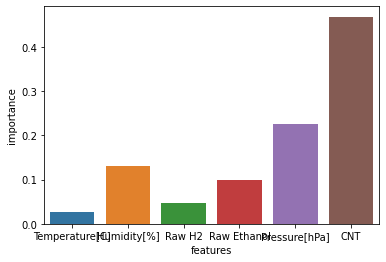

In [38]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="features", y="importance", data=ftip_df)
ax.set_xticklabels(x.)